### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [76]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [77]:
cali = pd.read_csv('data/housing.csv')

In [78]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

cat_features = ['ocean_proximity']
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical_features', make_pipeline(SimpleImputer(),PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('Categorical_feature', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create a pipeline
pipeline = Pipeline([('Preprocessor', preprocessor), ('LinModel', LinearRegression())
])
pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Numerical_features',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'median_house_value']),
                                                 ('Categorical_feature',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('LinModel', LinearRegression())])

In [69]:
# Applying one-hot encoding
df_encoded = pd.get_dummies(cali, columns=['ocean_proximity'])
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(int)
df_encoded.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15276,-117,33,24,2628,527,1389,520,4,343200,0,0,0,0,1
19794,-123,40,17,769,205,301,126,1,55000,0,1,0,0,0
8098,-118,33,38,1486,359,1345,326,3,147800,0,0,0,0,1
1110,-121,39,11,3974,727,1610,634,2,107700,0,1,0,0,0
18658,-121,36,24,3010,562,1360,504,4,290700,0,0,0,0,1


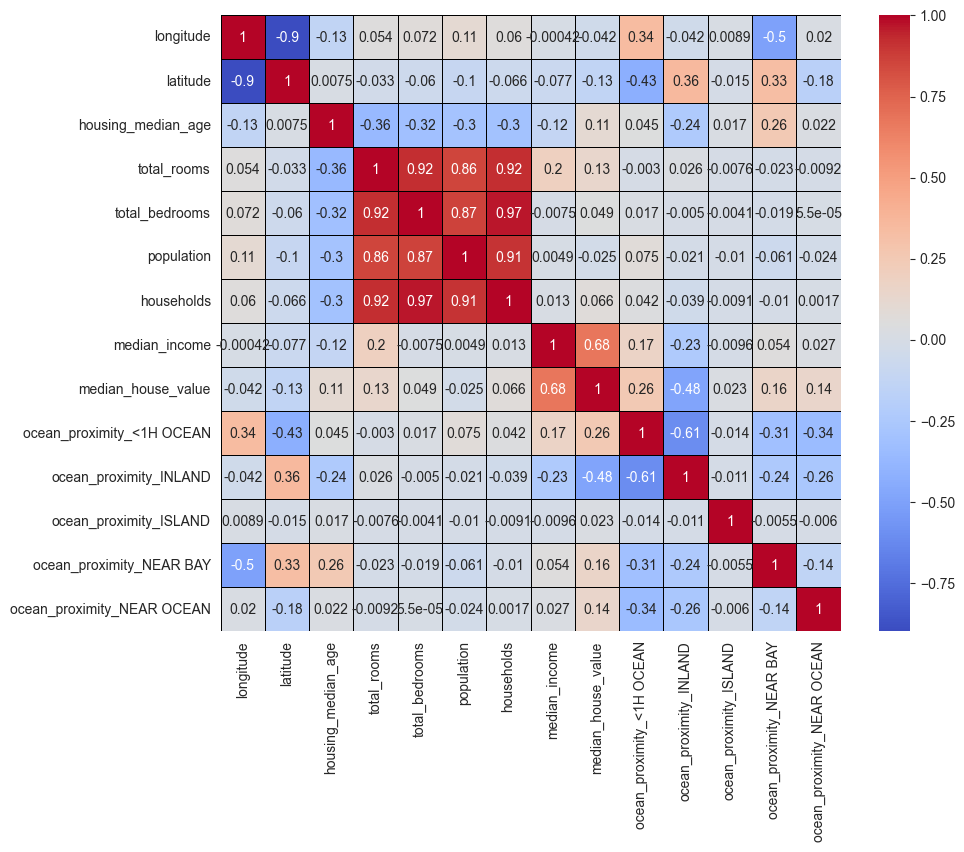

In [87]:
# Calculate the correlation matrix for the smaller DataFrame
corr = df_encoded.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)  # Consider turning off annotations for speed
plt.show()

In [65]:
# separate data into target & independent variables 
x = df_encoded.drop(['median_house_value','longitude', 'latitude'], axis=1) 
y = df_encoded['median_house_value'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0) 

# Printing shapes of the sets
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('x_test:', y_test.shape,'\n')

print('x_train type:', type(x_train))
print('x_test type:', type(x_test))
print('y_train type:', type(y_train))
print('y_test type:', type(y_test))

x_train: (14447, 11)
y_train: (14447,)
x_test: (6193, 11)
x_test: (6193,) 

x_train type: <class 'pandas.core.frame.DataFrame'>
x_test type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


In [45]:
# Calculate MSEs for trained data and test data
pipe_model = Pipeline([('PolyFeatures',PolynomialFeatures(degree =3, include_bias=False)),('LinModel',LinearRegression())])
pipe_model.fit(x_train,y_train)

y_train_pred = pipe_model.predict(x_train)
y_test_pred = pipe_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for training data: {mse_train}')
print(f'MSE for test data: {mse_test}')


MSE for training data: 3841804818.6696196
MSE for test data: 66790781272.03387


In [90]:
# Calculate the permutation importance
results = permutation_importance(pipe_model, x_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=x.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

                              Importance
ocean_proximity_<1H OCEAN   16069.397187
ocean_proximity_INLAND      15125.709019
ocean_proximity_NEAR OCEAN   6035.317368
ocean_proximity_NEAR BAY     4254.207529
households                    742.738045
total_rooms                   124.879483
population                     78.367839
ocean_proximity_ISLAND         53.720636
total_bedrooms                 30.050894
median_income                   0.982651
housing_median_age             -0.973146
